## Data analysis

First, let's look at the data files we have. They are divided into 2 categories:
1) data about the advertisement and the user to whom it was shown (impressions);
2) data about advertising and users who clicked on it (clicks).

In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
pd.set_option('display.max_columns', None)

### Impressions

The 2021-06-15-imp.csv file contains about 120 million lines, so the content will have to be considered and processed in fragments.

In [7]:
df_impr = pd.read_csv('2021-06-15-impr.csv', nrows=8000)
df_impr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              8000 non-null   object 
 1   dateTime          8000 non-null   object 
 2   campaign          8000 non-null   int64  
 3   campaignType      8000 non-null   int64  
 4   spot              8000 non-null   int64  
 5   banner            8000 non-null   int64  
 6   bannerSize        8000 non-null   object 
 7   uid               8000 non-null   object 
 8   language          8000 non-null   object 
 9   ip                8000 non-null   object 
 10  country           8000 non-null   object 
 11  city              8000 non-null   object 
 12  browser           8000 non-null   object 
 13  browserVersion    7997 non-null   float64
 14  os                8000 non-null   object 
 15  osVersion         8000 non-null   int64  
 16  deviceType        8000 non-null   object 


In [12]:
df_impr.head()

,date,dateTime,campaign,campaignType,spot,banner,bannerSize,uid,language,ip,country,city,browser,browserVersion,os,osVersion,deviceType,deviceModel,deviceBrand,trafficSource,affiliateNetwork,offer,path,ua,connType,proxyType,isp,impressions,costs
0,2021-06-15,2021-06-15 05:54:01,91868,2,22441,273577,300x250,Edkk6nofMj,ja,126.77.22.23,JP,Minato-ku,Chrome Mobile iOS,91.0,iOS,14,Phone,iPhone,Apple,17,1,38757,13616,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Cable/DSL,NaN,Softbank BB,1,0.000023
1,2021-06-15,2021-06-15 16:54:11,91868,2,22441,273577,300x250,uPGIpPBfpp,ja,60.68.128.248,JP,Minato-ku,Chrome Mobile iOS,91.0,iOS,14,Phone,iPhone,Apple,17,1,38757,13616,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like M...,Cable/DSL,NaN,Softbank BB,1,0.000023
2,2021-06-15,2021-06-15 18:05:59,91868,2,22441,273577,300x250,f9rQ4gB4MH,ja,60.125.35.199,JP,Minato-ku,Chrome Mobile iOS,91.0,iOS,14,Phone,iPhone,Apple,17,1,38757,13616,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Cable/DSL,NaN,Softbank BB,1,0.000023
3,2021-06-15,2021-06-15 01:24:56,91868,2,22441,273577,300x250,btnNxnBfp,ja,126.213.42.90,JP,Minato-ku,Chrome Mobile iOS,91.0,iOS,14,Phone,iPhone,Apple,17,1,38757,13616,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Cable/DSL,NaN,Softbank BB,1,0.000023
4,2021-06-15,2021-06-15 13:22:15,91868,2,22441,273577,300x250,McAqXZBfpp,ja,60.132.68.169,JP,Minato-ku,Chrome Mobile iOS,91.0,iOS,14,Phone,iPhone,Apple,17,1,38757,13616,Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like M...,Cable/DSL,NaN,Softbank BB,1,0.000023


Let's look at the number of unique elements in each column

In [9]:
# Unique elements in each column in the file with impressions
for column in df_impr:
    print(column, ':', df_impr[column].nunique())

date : 1
dateTime : 7396
campaign : 1
campaignType : 1
spot : 1
banner : 1
bannerSize : 1
uid : 7821
language : 1
ip : 6078
country : 1
city : 157
browser : 5
browserVersion : 25
os : 1
osVersion : 7
deviceType : 1
deviceModel : 1
deviceBrand : 1
trafficSource : 1
affiliateNetwork : 1
offer : 1
path : 1
ua : 237
connType : 3
proxyType : 3
isp : 71
impressions : 2
costs : 2


### Clicks
In the file 2021-06-15-clc.csv - about 1.5 million lines.

In [9]:
# Unique elements in each column in the file with clicks 
for column in clicks_df:
    print(column, ':', clicks_df[column].nunique())

date : 1
dateTime : 5735
campaign : 94
campaignType : 2
spot : 13
banner : 12
bannerSize : 4
uid : 4911
language : 48
ip : 4876
country : 122
city : 1402
browser : 31
browserVersion : 77
os : 10
osVersion : 19
deviceType : 6
deviceModel : 258
deviceBrand : 20
trafficSource : 6
affiliateNetwork : 1
offer : 17
path : 22
ua : 2013
connType : 4
proxyType : 3
action : 2
convType : 1
convPayout : 2
isp : 816
revenue : 3


Based on the number of unique values for each of the parameters, we can conclude that BinaryEncoder is best for encoding them.

### Analysis of records collected from the entire array of available data (files with impressions and clicks for the period 05/15/2021 - 06/15/2021)

In [11]:
# Loading a part of the collected data
impressions_1406 =  pd.read_csv("E:/Work/RTB/forGit/data/impressions_data_2021-06-14.csv")
click_1406 =  pd.read_csv("E:/Work/RTB/forGit/data/click_data_2021-06-14.csv")

It should be noted that when processing the data and creating a sample, it was found that one column can contain data of different types.

In [12]:
# Displaying information about impression data for 06/14/2021
impressions_1406.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12915 entries, 0 to 12914
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dateTime        12915 non-null  object 
 1   campaign        12915 non-null  int64  
 2   campaignType    12915 non-null  int64  
 3   spot            12915 non-null  int64  
 4   banner          12915 non-null  int64  
 5   bannerSize      12915 non-null  object 
 6   uid             12915 non-null  object 
 7   language        12883 non-null  object 
 8   ip              12915 non-null  object 
 9   country         12905 non-null  object 
 10  city            11847 non-null  object 
 11  browser         12915 non-null  object 
 12  browserVersion  12892 non-null  float64
 13  os              12915 non-null  object 
 14  osVersion       12856 non-null  object 
 15  deviceType      12915 non-null  object 
 16  deviceModel     7645 non-null   object 
 17  deviceBrand     7645 non-null  

In [13]:
# Displaying information about data on "clicks" for 06/14/2021
click_1406.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dateTime         574 non-null    object 
 1   campaign_x       574 non-null    int64  
 2   campaignType_x   574 non-null    int64  
 3   spot             574 non-null    int64  
 4   banner           574 non-null    int64  
 5   bannerSize       574 non-null    object 
 6   uid              574 non-null    object 
 7   language         574 non-null    object 
 8   ip               574 non-null    object 
 9   country          574 non-null    object 
 10  city             534 non-null    object 
 11  browser          574 non-null    object 
 12  browserVersion   574 non-null    float64
 13  os               574 non-null    object 
 14  osVersion        570 non-null    object 
 15  deviceType       574 non-null    object 
 16  deviceModel      419 non-null    object 
 17  deviceBrand     

Unique values in data

In [14]:
for column in impressions_1406:
    print(column, ':', impressions_1406[column].nunique())

dateTime : 11954
campaign : 409
campaignType : 1
spot : 409
banner : 152
bannerSize : 10
uid : 12904
language : 46
ip : 12827
country : 123
city : 2465
browser : 42
browserVersion : 91
os : 10
osVersion : 34
deviceType : 6
deviceModel : 367
deviceBrand : 24
trafficSource : 9
offer : 17
path : 186
ua : 3258
connType : 4
proxyType : 5


In [15]:
for column in click_1406:
    print(column, ':', click_1406[column].nunique())

dateTime : 334
campaign_x : 61
campaignType_x : 1
spot : 61
banner : 59
bannerSize : 6
uid : 330
language : 11
ip : 330
country : 26
city : 125
browser : 21
browserVersion : 53
os : 6
osVersion : 23
deviceType : 3
deviceModel : 81
deviceBrand : 14
trafficSource_x : 7
offer_x : 11
path_x : 63
ua : 271
connType : 3
proxyType : 3
campaign_y : 49
campaignType_y : 2
trafficSource_y : 10
offer_y : 17
path_y : 19
action : 1
convType : 0
convPayout : 1
revenue : 1


When examining the received files, it was found that the records in which there is a positive income are completely absent in the files with impressions.
The program that collects data has been supplemented in such a way that an array of data with clicks is formed separately, which is not compared with data from files with impressions.

In [89]:
# Uploading a file with "clicks" in which users are present
# with non-zero income
rev_test =  pd.read_csv("E:/Work/RTB/forGit/data/revenue_2021-05-17.csv")

In [90]:
rev_test = rev_test.fillna(0)

Let's see how the amount of income is distributed. To do this, we will build a histogram (zero values are not considered, and the value is rounded)

<AxesSubplot:xlabel='revenue', ylabel='count'>

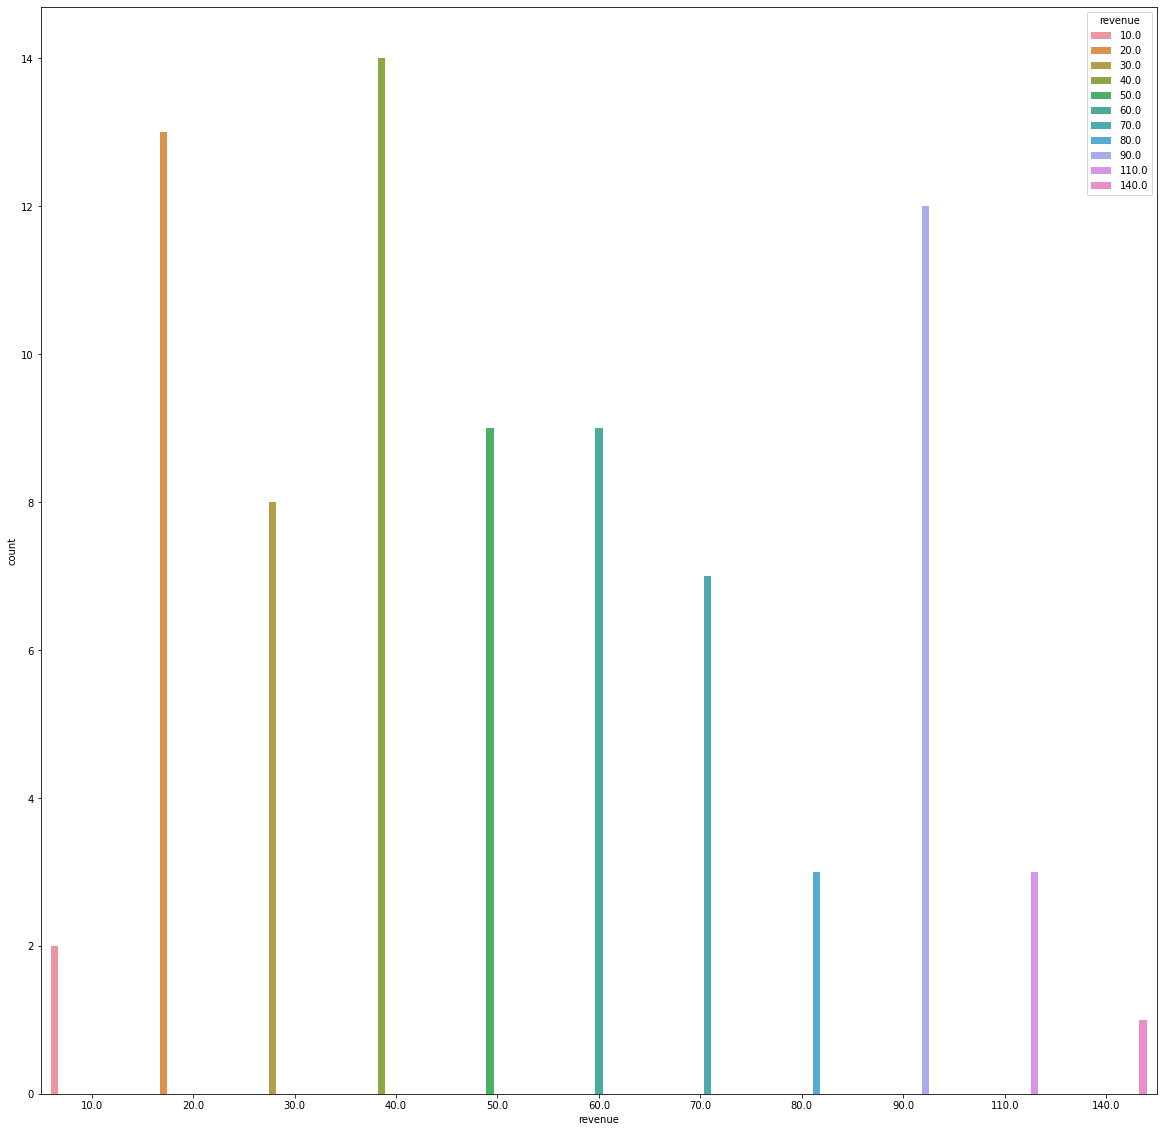

In [95]:
rev_test['revenue'] = round(rev_test['revenue'], -1)
click_revenue_1 = rev_test.loc[rev_test['revenue'] != 0]
sns.countplot(x = 'revenue', hue = "revenue", data = click_revenue_1)